<center><h1>Ye_Jinyi_HW2</h1></center>
<br>
<br>

Name: Jinyi Ye
<br>
Github Username: angelayejinyi
<br>
USC ID: 1552624974

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

Get the Cycle Power Plant Data Set

In [2]:
df = pd.read_excel('data/Folds5x2_pp.xlsx')

### (b) Exploring the data

#### i. rows and columns

In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


There are 9568 rows and 5 columns in the dataset. Each row represent a sample data point. For the columns, there four features which consist of hourly average ambient variables Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP) and Relative Humidity (RH). The column of net hourly electrical energy output (PE) of the plant is the value we want to predict based on the four features.

#### ii. pairwise scatterplots of all the variables

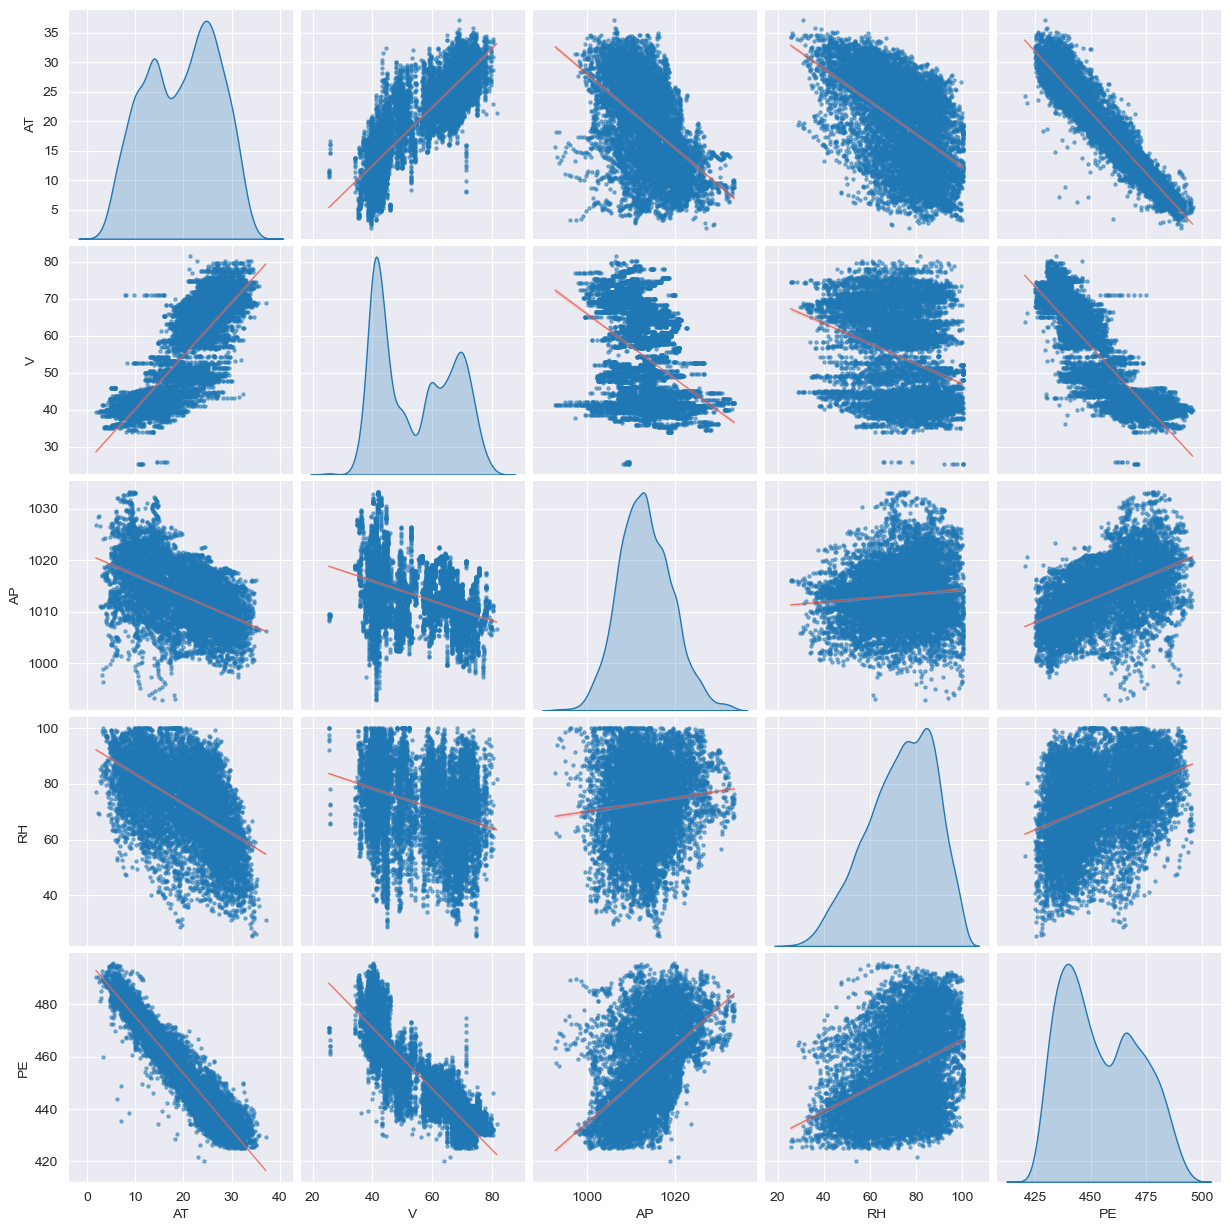

In [4]:
sns.set_style('darkgrid')
pair_plot = sns.pairplot(df, diag_kind='kde', kind='reg',
                            plot_kws={'scatter_kws':{'marker':'+', 'linewidth':1, 's':5, 'alpha':0.5},
                            'line_kws':{'color':'#E74C3C', 'linewidth': 1, 'alpha': 0.7}})
plt.show()

From the pairwise scatterplots with regression lines, we can see that generally, net hourly electrical energy output (PE) is negatively correlated with Temperature (AT) and Exhaust Vacuum (V), and positively correlated with Ambient Pressure (AP) and Relative Humidity (RH).

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
variable = [col for col in df.columns]
mean = [np.around(df[col].mean(), 2) for col in df.columns]
median = [np.around(df[col].median(), 2) for col in df.columns]
range_ = [np.around(df[col].max() - df[col].min(), 2) for col in df.columns]
first_quartile = [np.around(df[col].quantile(0.25), 2) for col in df.columns]
third_quartile = [np.around(df[col].quantile(0.75), 2) for col in df.columns]
interquartile_range = [np.around(b - a, 2) for b, a in zip(first_quartile, third_quartile)]

summary_df = pd.DataFrame({'variable': variable,
                        'mean': mean,
                        'median': median,
                        'range_': range_,
                        'first_quartile': first_quartile,
                        'third_quartile': third_quartile,
                        'interquartile_range': interquartile_range})

summary_df

,variable,mean,median,range_,first_quartile,third_quartile,interquartile_range
0,AT,19.65,20.34,35.30,13.51,25.72,-12.21
1,V,54.31,52.08,56.20,41.74,66.54,-24.80
2,AP,1013.26,1012.94,40.41,1009.10,1017.26,-8.16
3,RH,73.31,74.97,74.60,63.33,84.83,-21.50
4,PE,454.37,451.55,75.50,439.75,468.43,-28.68


### (c) Simple Linear Regression

In [6]:
def simple_lr(x, y):
    # fit simple linear regression model
    new_x = sm.add_constant(x)
    model = sm.OLS(y, new_x).fit()
    print(model.summary())
    
    # find outliers index
    test = model.outlier_test()
    outliers = test[test['bonf(p)'] < 0.05].index.values

    # plot linear regression graph and outliers
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(figsize=(10, 6))
    with plt.style.context('ggplot'):
        ax.scatter(x, y, alpha=0.3, label='Data Point')
        ax.scatter(x[outliers], y[outliers], label='Outlier', color='#FFC300')
        ax.plot(x, model.predict(new_x), color='#E74C3C', alpha=0.8, label='Regression Line')
    ax.set_title('Simple Linear Regression for {}'.format(x.name))
    ax.set_xlabel(x.name)
    ax.set_ylabel('PE')
    ax.legend()
    plt.show()

    # show outliers
    outlier_lst = [(x[idx],y[idx]) for idx in outliers]
    if len(outlier_lst) > 0:
        print('The outliers are:', outlier_lst)
    else:
        print('There are no outliers!')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:57:32   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

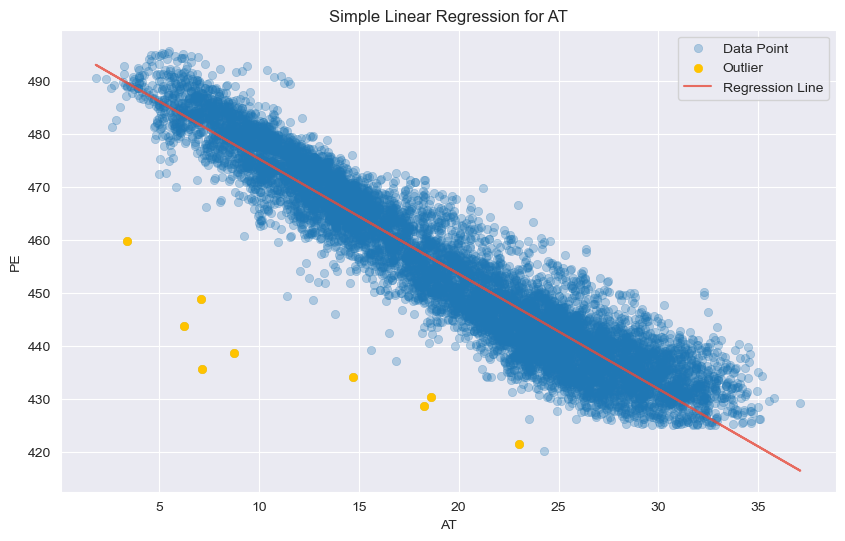

The outliers are: [(8.74, 438.63), (6.22, 443.73), (14.69, 434.12), (23.0, 421.57), (18.6, 430.38), (7.06, 448.97), (7.14, 435.58), (18.26, 428.67), (3.4, 459.86)]


In [7]:
# Simple linear regression for AT and PE
simple_lr(df.AT, df.PE)

Results show that **AT** significantly predicted **PE** *(β = -2.1713, p < .000)*. The overall regression was statistically significant ($R^2$ = .899, F(1, 9566) = 8.510e+04, p < .000).

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:58:01   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

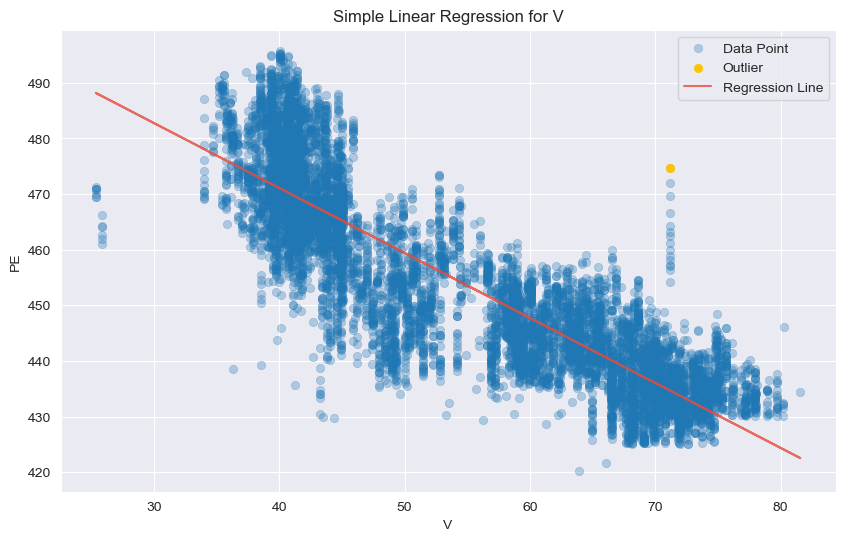

The outliers are: [(71.14, 474.66)]


In [8]:
# Simple linear regression for V and PE
simple_lr(df.V, df.PE)

Results show that **V** significantly predicted **PE** *(β = -1.1681, p < .000)*. The overall regression was statistically significant ($R^2$ = .757, F(1, 9566) = 2.972e+04, p < .000).

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:58:26   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

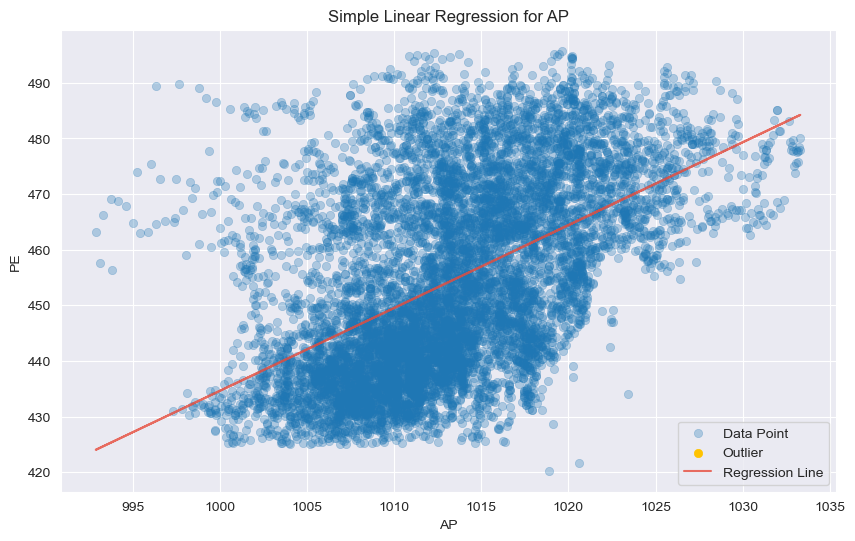

There are no outliers!


In [9]:
# Simple linear regression for AP and PE
simple_lr(df.AP, df.PE)

Results show that **AP** significantly predicted **PE** *(β = 1.4899, p < .000)*. The overall regression was statistically significant ($R^2$ = .269, F(1, 9566) = 3516, p < .000).

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:59:05   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

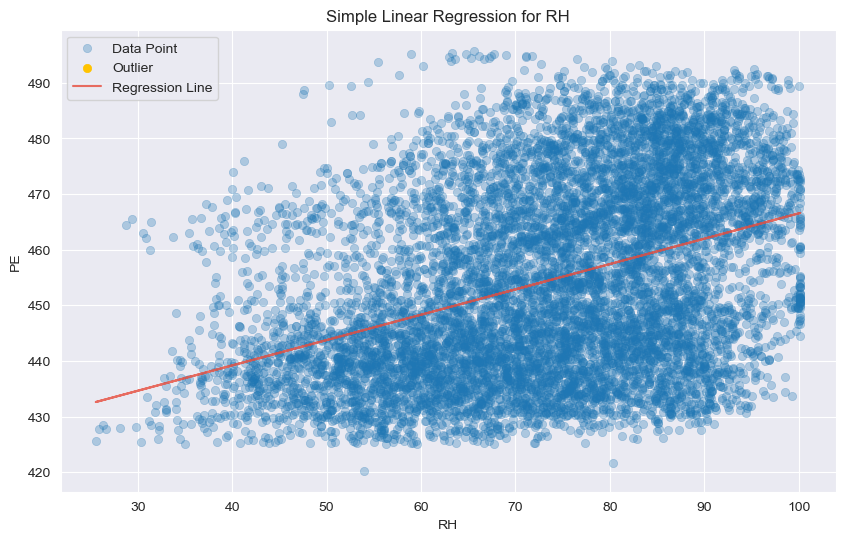

There are no outliers!


In [10]:
# Simple linear regression for RH and PE
simple_lr(df.RH, df.PE)

Results show that **RH** significantly predicted **PE** *(β = 0.4557, p < .000)*. The overall regression was statistically significant ($R^2$ = .152, F(1, 9566) = 1714, p < .000).

### (d) Multiple Regression

In [11]:
def multiple_lr(x, y):
    x = sm.add_constant(x, prepend=False)
    model = sm.OLS(y, x).fit()
    print(model.summary())  

In [12]:
# set exogenous and endogenous variables
df_exog = df.iloc[:, :-1]
df_endog = df.iloc[:, -1]
multiple_lr(df_exog, df_endog)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:59:33   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9775      0.015   -129.342      0.0

The p values for all features are 0.000. Thus, we can reject all the null hypothesis $H_{0}$ : $\beta_j = 0$.

### (e) 1c Compare to 1d

In [13]:
# get a tuple of coefficients
AT_params = (sm.OLS(df.PE, sm.add_constant(df.AT)).fit().params[1],
            sm.OLS(df.PE, sm.add_constant(df_exog, prepend=False)).fit().params[0])
V_params = (sm.OLS(df.PE, sm.add_constant(df.V)).fit().params[1],
            sm.OLS(df.PE, sm.add_constant(df_exog, prepend=False)).fit().params[1])
AP_params = (sm.OLS(df.PE, sm.add_constant(df.AP)).fit().params[1],
            sm.OLS(df.PE, sm.add_constant(df_exog, prepend=False)).fit().params[2])
RH_params = (sm.OLS(df.PE, sm.add_constant(df.RH)).fit().params[1],
            sm.OLS(df.PE, sm.add_constant(df_exog, prepend=False)).fit().params[3])


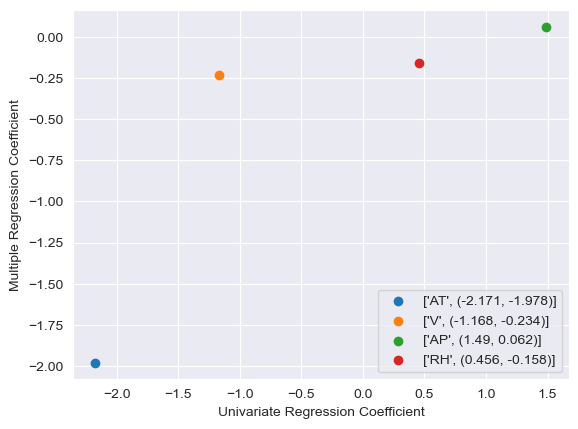

In [32]:
# plot the coordinates
d = {}
d['AT'] = np.around(AT_params,3)
d['V'] = np.around(V_params,3)
d['AP'] = np.around(AP_params,3)
d['RH'] = np.around(RH_params,3)

fig, axes = plt.subplots()
for key,value in d.items():
    axes.scatter(value[0], value[1], label=[key,(value[0],value[1])])
axes.legend()
plt.xlabel('Univariate Regression Coefficient')
plt.ylabel('Multiple Regression Coefficient')
plt.show()


### (f) Nonlinear Association

In [60]:
from sklearn.preprocessing import PolynomialFeatures
def poly_reg(x, y):
    polynomial_features= PolynomialFeatures(degree=3)
    xp = polynomial_features.fit_transform(x.to_numpy().reshape(-1, 1))
    model = sm.OLS(y, xp).fit()
    ypred = model.predict(xp)
    print(model.summary())

In [61]:
poly_reg(df['AT'], df['PE'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:43:49   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

We can see that $AT$, $AT^2$ and $AT^3$ are all significant predictors for the quadratic model (with p < 0.000). 

In [43]:
poly_reg(df['V'], df['PE'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:31:42   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

We can see that $V$ and $V^3$ are significant predictors for the quadratic model (with p < 0.000 and p < 0.05, respectively). 

In [44]:
poly_reg(df['AP'], df['PE'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:31:49   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

We can see that $AP$, $AP^2$ and $AP^3$ are all significant predictors for the quadratic model (with p < 0.000). 

In [45]:
poly_reg(df['RH'], df['PE'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:31:57   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

We can see that $RH$, $RH^2$ and $RH^3$ are all significant predictors for the quadratic model (with p < 0.000). 

In [ ]:
# References
# https://ostwalprasad.github.io/machine-learning/Polynomial-Regression-using-statsmodel.html

### (g) Interactions of Predictors

In [74]:
import statsmodels.formula.api as smf

model = smf.ols(formula='PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:14:24   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

Under the 0.05 significance level, we can conclude that $V$, $AP$, $RH$, $AT:V$, $AT:RH$, $V:AP$, $AP:RH$ are statistically significant.

### (h) Improvement

In [87]:
from sklearn.model_selection import train_test_split

# split train and test data, and fixing the random state
train_df, test_df = train_test_split(df, test_size=0.3, random_state=0)

In [98]:
# model using all predictors (multiple regression)
model_multi = smf.ols(formula='PE ~ AT + V + AP + RH', data=train_df).fit()
ypred_train1 = model_multi.predict(train_df.iloc[:,:4])
ypred_test1 = model_multi.predict(test_df.iloc[:,:4])
train_mse1 = sum(np.power(ypred_train1 - train_df.iloc[:,4], 2))/len(ypred_train1)
test_mse1 = sum(np.power(ypred_test1 - test_df.iloc[:,4], 2))/len(ypred_test1)

print(model_multi.summary())
print('Train MSE: ', train_mse1)
print('Test MSE: ', test_mse1)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.155e+04
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:35:59   Log-Likelihood:                -19688.
No. Observations:                6697   AIC:                         3.939e+04
Df Residuals:                    6692   BIC:                         3.942e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    448.5613     11.745     38.192      0.0

In [99]:
# model using all possible interaction terms and quadratic nonlinearities
model_all = smf.ols(formula='PE ~ AT + V + AP + RH + \
                                np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) +\
                                AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH', data=train_df).fit()
ypred_train2 = model_all.predict(train_df.iloc[:,:4])
ypred_test2 = model_all.predict(test_df.iloc[:,:4])
train_mse2 = sum(np.power(ypred_train2 - train_df.iloc[:,4], 2))/len(ypred_train2)
test_mse2 = sum(np.power(ypred_test2 - test_df.iloc[:,4], 2))/len(ypred_test2)

print(model_all.summary())
print('Train MSE: ', train_mse2)
print('Test MSE: ', test_mse2)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:36:26   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7073.1567   1505.522     

In [101]:
# model using all possible interaction terms and quadratic nonlinearities, removing insignificant features
model_all_revised = smf.ols(formula='PE ~ AT + V + AP + RH + \
                                np.power(AT,2) + np.power(AP,2) + np.power(RH,2) +\
                                AT*V + AT*RH + AP*RH', data=train_df).fit()
ypred_train3 = model_all_revised.predict(train_df.iloc[:,:4])
ypred_test3 = model_all_revised.predict(test_df.iloc[:,:4])
train_mse3 = sum(np.power(ypred_train3 - train_df.iloc[:,4], 2))/len(ypred_train3)
test_mse3 = sum(np.power(ypred_test3 - test_df.iloc[:,4], 2))/len(ypred_test3)

print(model_all_revised.summary())
print('Train MSE: ', train_mse3)
print('Test MSE: ', test_mse3)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9892.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:39:02   Log-Likelihood:                -19255.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6686   BIC:                         3.861e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.001e+04   1121.577     

For formula: PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(AP,2) + np.power(RH,2) + AT * V + AT * RH + AP * RH, we have train MSE of 18.40 and test MSE of 17.57.

### (i) KNN

In [113]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [144]:
# write KNN function
def knn(X_train, y_train, X_test, y_test):
    k_value = []
    train_mse_lst = []
    test_mse_lst = []

    for k in range(1, 101, 1):
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        ypred_train = model.predict(X_train)
        ypred_test = model.predict(X_test)
        train_mse = mean_squared_error(ypred_train, y_train)
        test_mse = mean_squared_error(ypred_test, y_test)
        train_mse_lst.append(train_mse)
        test_mse_lst.append(test_mse)
        k_value.append(k)
    
    min_index = test_mse_lst.index(min(test_mse_lst))
    k_star = k_value[min_index]

    sns.set_style('darkgrid')
    sns.set(font_scale=0.8)
    lineplot = sns.lineplot(x = [1/k for k in k_value], y = train_mse_lst, color='r', lw=1)
    lineplot = sns.lineplot(x = [1/k for k in k_value], y = test_mse_lst, color='b', lw=1)
    lineplot.set(xlabel='1/K', ylabel='MSE Score', title='Performance Under Varying K Values')
    plt.legend(labels=['train_mse','test_mse'])
    plt.show()

    print('The best K value is:', k_star)
    print('The smallest test MSE is:', min(test_mse_lst))
    print('The corresponding train MSE is: ', train_mse_lst[min_index])

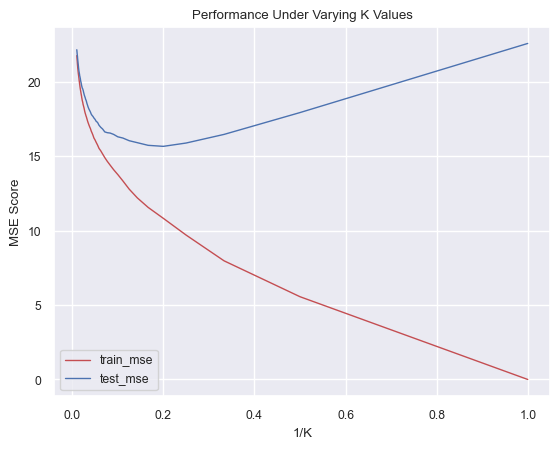

The best K value is: 5
The smallest test MSE is: 15.6635051689307
The corresponding train MSE is:  10.826427918172316


In [145]:
# knn for original data
X_train = train_df.iloc[:,:4]
y_train = train_df.iloc[:,4]
X_test = test_df.iloc[:,:4]
y_test = test_df.iloc[:,4]
knn(X_train, y_train, X_test, y_test)

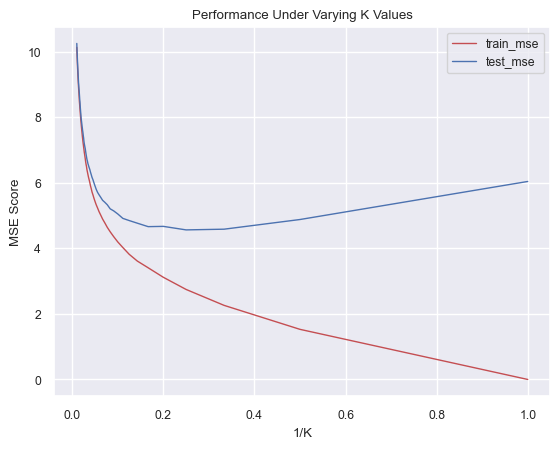

The best K value is: 4
The smallest test MSE is: 4.561530736241728
The corresponding train MSE is:  2.7449587613856963


In [146]:
# knn for normalized data
from sklearn.preprocessing import normalize
train_df_normal = normalize(train_df)
test_df_normal = normalize(test_df)
X_train = train_df_normal[:,:4]
y_train = train_df.iloc[:,4]
X_test = test_df_normal[:,:4]
y_test = test_df.iloc[:,4]
knn(X_train, y_train, X_test, y_test)

### (j ) Compare KNN and Linear

In [150]:
model_summary = pd.DataFrame({
    'Multiple LR': ['20.94', '20.37'],
    'All Predictor LR': ['18.37', '17.52'],
    'All Predictor LR Revised': ['18.40', '17.57'],
    'KNN Raw Data': ['10.83', '15.66'],
    'KNN Normalized Data': ['2.74', '4.56']}, 
    index=["train_mse", "test_mse"])
model_summary

,Multiple LR,All Predictor LR,All Predictor LR Revised,KNN Raw Data,KNN Normalized Data
train_mse,20.94,18.37,18.40,10.83,2.74
test_mse,20.37,17.52,17.57,15.66,4.56


For this dataset, KNN regressor seems to have a better performance according to the recorded MSE shown in table above. The reason may be for high dimensional data, linear regression can suffer from overfitting, the curse of dimensionality, and computational complexity. However, KNN can be more robust to overfitting in high dimensional data, but it can be computationally expensive and may not work well when the number of features is very large.

Another thing to discuss is that KNN performs a lot better for normalized data. Normalizing the features to have similar scales can help ensure that all features contribute equally to the distance calculation and can result in a more accurate model. However, it is not always the case, for normalizing data may also undermine potentially important features.

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

Here the flexible method may be better, for an inflexible method will suffer underfitting. Having a large sample size (n) generally improves model performance and more accurate estimated coefficients.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

The performance of an inflexible statistical learning method can be better than a flexible method. This is because having a large number of predictors relative to the number of observations increases the risk of overfitting.

### (c) The relationship between the predictors and response is highly non-linear.

When the relationship between the predictors and response is highly non-linear, the performance of a flexible statistical learning method is typically better than an inflexible method. Flexible methods, such as non-parametric regression and decision trees, can capture complex, non-linear relationships between the predictors and response.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

When the variance of the error terms is extremely high, the performance of a flexible statistical learning method can be worse than an inflexible method, as the model may fit the training data too closely and capture the noise or random fluctuations in the data instead of the underlying pattern.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [158]:
from sklearn.metrics.pairwise import euclidean_distances
data = [[0,3,0,'Red'],
       [2,0,0,'Red'],
       [0,1,3,'Red'],
       [0,1,2,'Green'],
       [-1,0,1,'Green'],
       [1,1,1,'Red']]
df = pd.DataFrame(data, columns=["X1", "X2", "X3", "Y"])
train_X = df.iloc[:, :3].to_numpy()
train_Y = df.iloc[:, -1].to_numpy()
test_X = np.array([[0, 0, 0]])

dist_lst = euclidean_distances(train_X, test_X)

for i, d in enumerate(dist_lst):
    print("The Euclidean distance between obs[{}] and the testpoint is {}".format(i+1, d[0]))

The Euclidean distance between obs[1] and the testpoint is 3.0
The Euclidean distance between obs[2] and the testpoint is 2.0
The Euclidean distance between obs[3] and the testpoint is 3.1622776601683795
The Euclidean distance between obs[4] and the testpoint is 2.23606797749979
The Euclidean distance between obs[5] and the testpoint is 1.4142135623730951
The Euclidean distance between obs[6] and the testpoint is 1.7320508075688772


### (b) What is our prediction with K = 1? Why?

Green. The nearest 1 neighbor for [0,0,0] is ob[5], which is green.

### (c) What is our prediction with K = 3? Why?

Red. The nearest 3 neighbors for [0,0,0] is ob[2](red), ob[5](green) and ob[6](red), so the final prediction is red based on majority polling.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

We expect K to be small, for small Ks generate a more curvy boundary.